# Lab 13
- PCA
- TSNE

## PCA (Principal Component Analysis)
Analiza głównych składników jest szybką metodą redukcji wymiarowości danych.
Polega na znalezieniu liniowej transformacji zbioru zmiennych początkowych w mniej liczny zbiór zmiennych, zwanych składowymi głównymi. Jest to pewien sposób kompresji danych, dlatego metodę tę można wykorzystać w wielu dziedzinach nauki.


**Algorytm PCA:**
1. Standaryzacja danych
2. Wyznaczenie macierzy kowariancji $Σ$ między zmiennymi początkowymi
3. Wyznaczenie wartości własnych macierzy kowariancji
4. Wybranie $k$ największych wartości własnych i wyznaczenie dla nich wektorów własnych
5. Utworzenie macierzy przekształcenia liniowego $W$, bazującej na wektorach własnych
6. Przekształcenie zmiennych początkowych według wzoru $Y = WX$

![](./fig/pca_matrix.png)
![](./fig/pca_gif.gif)

### Przykład dla sztucznych danych

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape

(200, 2)

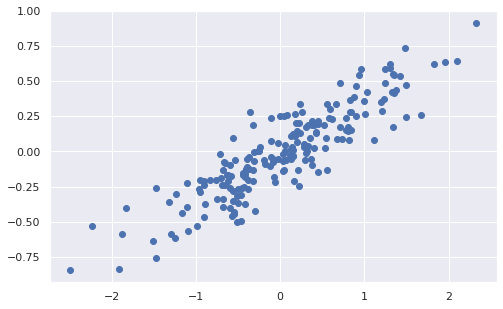

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### Jeden komponent

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
# Kierunki zmiennych PCA
pca.components_

array([[-0.94446029, -0.32862557]])

In [6]:
# Wyjaśniona wariancja
print(f'Total variance: {np.sqrt(np.std(X)):.4f}')
pca.explained_variance_

Total variance: 0.7897


array([0.7625315])

In [7]:
# Procent wyjaśnionej wariancji
pca.explained_variance_ratio_

array([0.97634101])

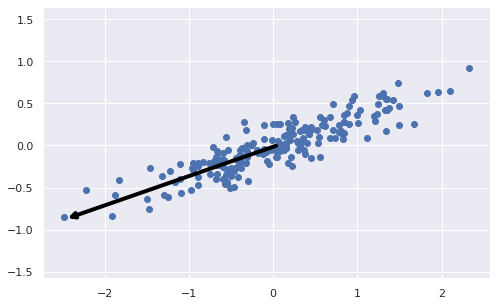

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

#### 2 komponenty

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Kierunki zmiennych PCA
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [11]:
# Wyjaśniona wariancja
print(f'Total variance: {np.sqrt(np.std(X)):.4f}')
pca.explained_variance_

Total variance: 0.7897


array([0.7625315, 0.0184779])

In [12]:
# Procent wyjaśnionej wariancji
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

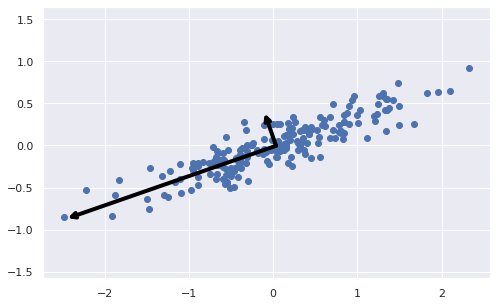

In [13]:
# plot data
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.show()

### Dobieranie odpowiedniej liczby komponentów

In [14]:
import pandas as pd
hitters = pd.read_csv('hitters.csv')
hitters.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,1,1,632,43,10,475.0,1
1,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,0,1,880,82,14,480.0,0
2,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,1,0,200,11,3,500.0,1
3,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,1,0,805,40,4,91.5,1
4,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,0,1,282,421,25,750.0,0


#### Wydzielenie zmiennej celu i podział na zbiór treningowy i testowy

In [15]:
from sklearn.model_selection import train_test_split

y = hitters['NewLeague']
X = hitters.drop(['Name','NewLeague','League','Division'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

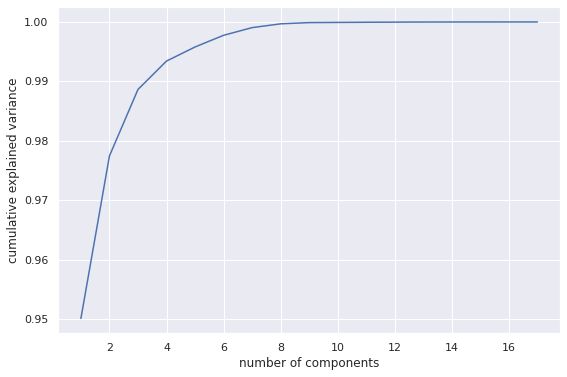

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Zobaczmy jak poradzi sobie klasyfikacja dla surowych danych i dla PCA

Accuracy bez PCA: 0.5185


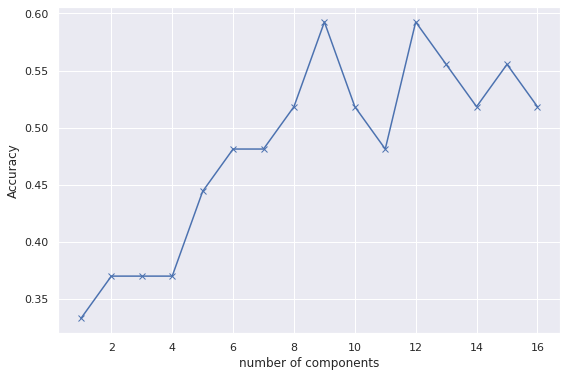

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=0)

# Surowe dane
y_hat = model.fit(X_train,y_train).predict(X_test)
print(f'Accuracy bez PCA: {accuracy_score(y_test, y_hat):.4f}')

# PCA - odczytane z wykresu
comp_acc_pairs = []
for i in range(1,17):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    y_hat = model.fit(pca.transform(X_train),y_train).predict(pca.fit_transform(pca.transform(X_test)))
    comp_acc_pairs.append((i, accuracy_score(y_test, y_hat)))
    
plt.figure(figsize=(9,6))
plt.plot(*list(zip(*comp_acc_pairs)),'bx-')
plt.xlabel('number of components')
plt.ylabel('Accuracy');

## T-SNE

Pytanie: Jak zwizualizować dane wielowymiarowe?

**t-distributed Stochastic Neighbor Embedding**

Cel: Pokazać ukryte zależności wielowymiarowych danych w 2D lub 3D.

Idea: Chcemy, aby obserwacje podobne do siebie w wielu wymiarach były blisko siebie w podprzestrzeni.

Wyróżnijmy:  
**obserwacja x** - wielowymiarowy wektor cech o wymiarze zgodnym z wymiarem danych.  
**mapowanie y** - dwu- lub trzy- wymiarowy wektor określający pozycje obserwacji na mapie.

1. Obliczamy odległosci pomiędzy obserwacjami poprzez wyliczenie odpowiednich prawdopodobieństw warunkowych.
Im bardziej obserwacje są podobne do siebie, tym większe prawdopodobieństwo. 

$$p_{j|i} = \frac{\exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_j) / (2 \sigma_i^2)})}{\sum_{i \neq k} \exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_k) / (2 \sigma_i^2)})}, \quad p_{i|i} = 0,$$

Powyższy wzorek określa podobieństwo dwóch obserwacji z wykorzystaniem rozkładu normalnego scentrowanego w $x_{i}$. $\sigma_{i}$ wyznaczana jest osobno dla każdej cechy w zależności od jej wariancji. W `sklearn` możemy wpływać na "spłaszczenie" lub "zwężanie" rozkładu poprzez parametr `perplexity`.

Aby skorzystać z symetrii wprowadzamy:  

$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}.$$

W ten sposób otrzymujemy macierz podobieństwa **P** (ang. *similarity matrix*)

2. Następnie rozważamy macierz **Q** stanowiącą podobne odwzorowanie co powyżej, ale dla mapowań. Z przyczyn, które na razie pomińmy prawdopodobieństwa nie są liczone z wykorzystaniem rozkładu normalnego, ale t-Studenta o jednym stopniu swobody (rozkład Cauchy'ego):

$$q_{ij} = \frac{(1 + ||\boldsymbol{y}_i - \boldsymbol{y}_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||\boldsymbol{y}_k - \boldsymbol{y}_l||^2)^{-1}},$$

3. Zaszliśmy daleko. Rozważamy teraz takie "umiejscowienie" obserwacji w przestrzeni o 2 lub 3 wymiarach, aby jak najbardziej zminimalizować różnicę pomiędzy dwiema macierzami (P i Q). Zmieniamy oczywiście macierz mapowań **Q**. Odpowiada to minimalizacji dywergencji Kullbacka-Leibera (https://pl.wikipedia.org/wiki/Dywergencja_Kullbacka-Leiblera, https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence):

$$KL(P|Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$


## Przykład 1

<img src="fig/caltech101_tsne.jpg" alt="drawing" width="600"/>

## Przykład 2

1. Użyjemy zbioru :https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [18]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2. Zawiera on 1797 obrazków cyfr w formacie 8x8 pikseli.

In [19]:
digits = load_digits()
digits.data.shape

(1797, 64)

3. Przykładowe obserwacje:

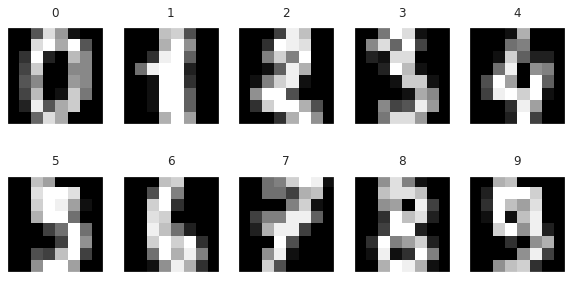

In [20]:
nrows, ncols = 2, 5
plt.figure(figsize=(10,5))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.show()

4. Uporządkowanie danych (tylko, aby pomóc nam w wizualizacji, algorytm tego nie wymaga)

In [21]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

5. Wywołanie PCA i wizualizacja

In [22]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add labels
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts


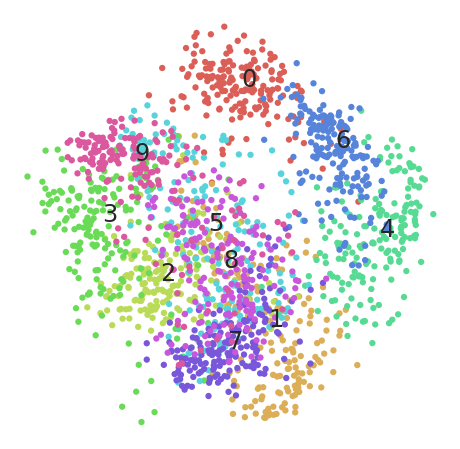

In [23]:
pca = PCA(n_components = 2)
digits_proj_pca = pca.fit_transform(X)
scatter(digits_proj_pca, y)
plt.show()

6. Wywołanie t-SNE

In [34]:
%%time
random_state = 1500100900
tSNE = TSNE(random_state=random_state, verbose=1)
digits_proj = tSNE.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.011s...
[t-SNE] Computed neighbors for 1797 samples in 0.336s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.866585
[t-SNE] KL divergence after 1000 iterations: 0.750101
CPU times: user 39.2 s, sys: 20.4 ms, total: 39.2 s
Wall time: 3.69 s


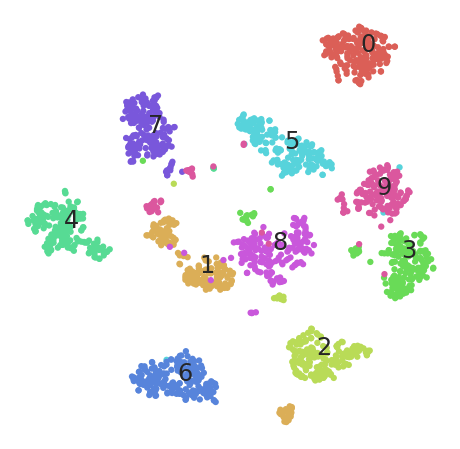

In [25]:
scatter(digits_proj, y)
plt.show()

In [26]:
tSNE.fit(X).get_params()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.009s...
[t-SNE] Computed neighbors for 1797 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.866585
[t-SNE] KL divergence after 1000 iterations: 0.750101


{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 1500100900,
 'verbose': 1}

7. Jak widzieliśmy powyżej, t-SNE jest kosztowne obliczeniowo nawet dla tak niewielkiego zbioru danych. Aby skrócić czas obliczeń, jeśli liczba cech jest znacząca, można połączyć oba podejścia: PCA + tSNE.

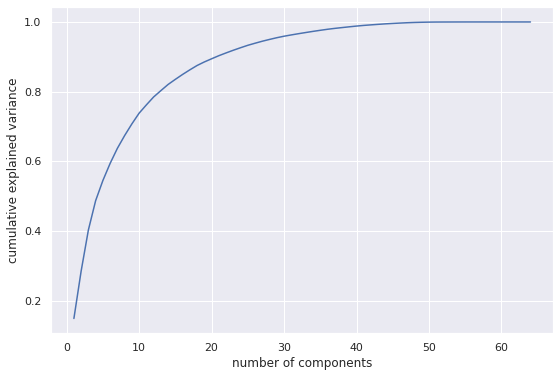

In [27]:
pca =  PCA().fit(X)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

8. Spróbujmy z `n_components=40`

In [28]:
np.cumsum(PCA(n_components=40).fit(X).explained_variance_ratio_)[-1]

0.9882027336466745

In [33]:
%%time
X_pca =  PCA(n_components=40).fit_transform(X)
random_state = 1500100900
digits_proj = TSNE(random_state=random_state).fit_transform(X_pca)

CPU times: user 40.6 s, sys: 851 ms, total: 41.5 s
Wall time: 3.7 s


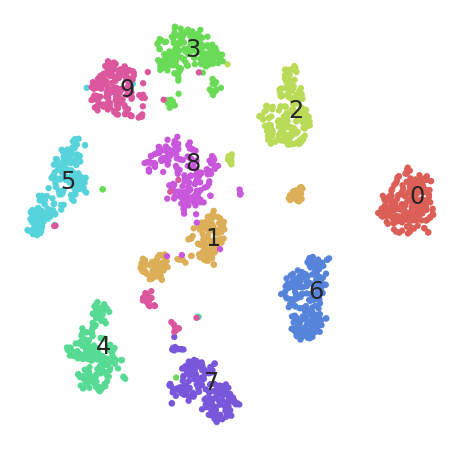

In [32]:
scatter(digits_proj, y)
plt.show()

9. Dlaczego t?

W algorytmie SNE zarówno dla macierzy **P** (odwzorowuje odległości między obserwacjami) jak i **Q** (między mapowaniami) wykorzystuje się rozkład Gaussa. Okazuje się, że prowadzi to często do zagęszczenia mapowań. Obserwacje średnio odległe od siebie uzyskują bliskie sobie mapowania. (the crowding problem)

Problem ten można zniwelować poprzez wykorzystanie dla mapowań rozkładu t-Studenta z jednym stopniem swobody (rozkład Cauchy'ego), który pozwala na lepsze odwzorowanie tych odległości dzięki własności grubych ogonów. Prowadzi to do lepszego odseparowania danych w mapowaniu.

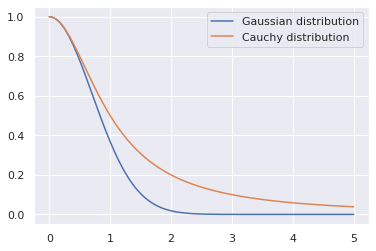

In [33]:
z = np.linspace(0., 5., 1000)
gauss = np.exp(-z**2)
cauchy = 1/(1+z**2)
plt.plot(z, gauss, label='Gaussian distribution')
plt.plot(z, cauchy, label='Cauchy distribution')
plt.legend()
plt.show()

10. Uwagi końcowe o t-SNE:
 - służy do wizualizacji danych wielowymiarowych,
 - zwykle znajduje zastosowanie dla danych od 5 do 50 wymiarów, 
 - wykorzystuje rozkład t-Studenta zamiast rozkładu normalnego (SNE), aby przeciwdziałać zbyt małym odstępom pomiędzy średnio-odległymi obserwacjami,
 - często jest wykorzystywane wraz z PCA, aby zmiejszyć czas obliczeń. 

Źródła:
   -  https://github.com/oreillymedia/t-SNE-tutorial,
   -  http://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf,
   -  https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb